In [2]:
import seaborn as sns
sns.set(font_scale=1)

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [41]:
# sheet_name = 3
df = pd.read_excel('../../data/dataset/2022년 06월  교통카드 통계자료.xls',sheet_name=3,skiprows=1,usecols='B,D:AV', thousands=',')
df.head()

,Unnamed: 1,Unnamed: 3,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,...,승차.17,하차.17,승차.18,하차.18,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21
0,1호선,서울역,646,24,8433,7694,12608,46963,39233,100397,...,76345,35471,51224,26045,20385,15480,158,1332,1,4
1,1호선,시청,271,7,3133,4802,3321,23621,6647,62427,...,43072,5598,29032,4091,9254,2938,72,422,0,2
2,1호선,종각,91,9,4007,3960,3682,22533,5814,95376,...,80861,7772,65832,5368,27781,3590,315,394,0,1
3,1호선,종로3가,190,12,3882,3261,3570,14038,4746,25469,...,51274,7492,42291,5558,17170,4119,310,843,3,3
4,1호선,종로5가,34,0,1730,3909,2986,16406,5020,41304,...,31369,5271,22016,3862,6208,2628,98,668,0,0


#### 컬럼명 변경

- Unnamed: 1, Unnamed: 3, 승차, 하차 --> 호선명, 지하철역,승차_4, 하차_4 ~ 승차_26, 하차_26

In [42]:
df.rename(columns={'Unnamed: 3':'지하철역'},inplace=True)

In [49]:
columns = ['호선명','지하철역']
for i in range(4,26):
    columns.append('승차_'+str(i))
    columns.append('하차_'+str(i))
columns

['호선명',
 '지하철역',
 '승차_4',
 '하차_4',
 '승차_5',
 '하차_5',
 '승차_6',
 '하차_6',
 '승차_7',
 '하차_7',
 '승차_8',
 '하차_8',
 '승차_9',
 '하차_9',
 '승차_10',
 '하차_10',
 '승차_11',
 '하차_11',
 '승차_12',
 '하차_12',
 '승차_13',
 '하차_13',
 '승차_14',
 '하차_14',
 '승차_15',
 '하차_15',
 '승차_16',
 '하차_16',
 '승차_17',
 '하차_17',
 '승차_18',
 '하차_18',
 '승차_19',
 '하차_19',
 '승차_20',
 '하차_20',
 '승차_21',
 '하차_21',
 '승차_22',
 '하차_22',
 '승차_23',
 '하차_23',
 '승차_24',
 '하차_24',
 '승차_25',
 '하차_25']

In [50]:
len(columns)

46

In [51]:
len(df.columns)

46

In [52]:
df.columns = columns

In [53]:
df.head()

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_21,하차_21,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25
0,1호선,서울역,646,24,8433,7694,12608,46963,39233,100397,...,76345,35471,51224,26045,20385,15480,158,1332,1,4
1,1호선,시청,271,7,3133,4802,3321,23621,6647,62427,...,43072,5598,29032,4091,9254,2938,72,422,0,2
2,1호선,종각,91,9,4007,3960,3682,22533,5814,95376,...,80861,7772,65832,5368,27781,3590,315,394,0,1
3,1호선,종로3가,190,12,3882,3261,3570,14038,4746,25469,...,51274,7492,42291,5558,17170,4119,310,843,3,3
4,1호선,종로5가,34,0,1730,3909,2986,16406,5020,41304,...,31369,5271,22016,3862,6208,2628,98,668,0,0


### 출근 시간대 사람들이 가장 많이 타는 역
- 승차_7 + 승차_8 + 승차_9 = 출근 계
- 하차_7 + 하차_8 + 하차_9 = 하차 계

In [54]:
df['출근 계'] = df['승차_7'] + df['승차_8'] + df['승차_9']
df['하차 계'] = df['하차_7'] + df['하차_8'] + df['하차_9']

In [58]:
df.sort_values('출근 계', ascending=False).head(1)


,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출근 계,하차 계
39,2호선,신림,253,10,38809,4518,73523,20593,188110,30954,...,40123,113573,20492,75909,3087,17134,6,188,638753,126731


In [59]:
df[df['출근 계'] == df['출근 계'].max()]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출근 계,하차 계
39,2호선,신림,253,10,38809,4518,73523,20593,188110,30954,...,40123,113573,20492,75909,3087,17134,6,188,638753,126731


### 출근 시간대 사람들이 가장 많이 내리는 역

In [60]:
df[df['하차 계'] == df['하차 계'].max()]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출근 계,하차 계
30,2호선,역삼,32,0,4342,6889,8419,38605,14518,138583,...,59777,14805,22742,9700,3222,2294,2,21,61350,775247


### 밤 11시에 사람들이 가장 많이 타는 역

In [63]:
df[df['승차_23'] == df['승차_23'].max()]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출근 계,하차 계
31,2호선,강남,231,8,11812,10667,19128,49306,37334,147542,...,176473,40499,81016,26765,12407,5773,2,35,148582,760050


### 사용자한테 입력 받은 시간대에 사람들이 가장 많이 타는 역

| 승차시각(t) | 인덱스(i) | 패턴 |
|-------------|-----------|------|
| 4 | 2 | i = 2 + (승차시각 - 4) * 2
| 5 | 4 |
| 6 | 6 |
| 7 | 8 |

In [110]:
hour = int(input('몇 시의 승차 인원이 가장 많은 역이 궁금하세요? 입력은 24시간 제로 해주세요 '))

몇 시의 승차 인원이 가장 많은 역이 궁금하세요? 입력은 24시간 제로 해주세요 10


In [111]:
print(hour)
str1 = '승차_' + str(hour)

df[df[str1] == df[str1].max()]

10


,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출근 계,하차 계
39,2호선,신림,253,10,38809,4518,73523,20593,188110,30954,...,40123,113573,20492,75909,3087,17134,6,188,638753,126731


### 강사님 풀이

In [112]:
idx = 2 + (hour - 4) * 2
idx

14

In [113]:
df[df.iloc[:,idx] == df.iloc[:, idx].max()]

,호선명,지하철역,승차_4,하차_4,승차_5,하차_5,승차_6,하차_6,승차_7,하차_7,...,승차_22,하차_22,승차_23,하차_23,승차_24,하차_24,승차_25,하차_25,출근 계,하차 계
39,2호선,신림,253,10,38809,4518,73523,20593,188110,30954,...,40123,113573,20492,75909,3087,17134,6,188,638753,126731


### 시간대별로 승객이 가장 많이 타고 내리는 역

In [114]:
df['승차_6'].max()

73523

#### 1) 4 ~ 24시 컬럼 추출

In [125]:
groups_col = df.columns.difference(['호선명','지하철역','승차_25','하차_25','출근 계','하차 계'], sort=False) 
# sort가 자동으로 걸려있음(컬럼 그대로 보고 싶다면 sort = False)

In [126]:
groups_col

Index(['승차_4', '하차_4', '승차_5', '하차_5', '승차_6', '하차_6', '승차_7', '하차_7', '승차_8',
       '하차_8', '승차_9', '하차_9', '승차_10', '하차_10', '승차_11', '하차_11', '승차_12',
       '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15', '하차_15', '승차_16',
       '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19', '하차_19', '승차_20',
       '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23', '하차_23', '승차_24',
       '하차_24'],
      dtype='object')

In [127]:
df[groups_col].max()

승차_4      11784
하차_4         63
승차_5      38809
하차_5      10667
승차_6      73523
하차_6      49306
승차_7     188110
하차_7     147542
승차_8     281017
하차_8     368521
승차_9     169626
하차_9     306893
승차_10     91989
하차_10    144675
승차_11     77496
하차_11    109164
승차_12     84383
하차_12    121850
승차_13     95697
하차_13    132667
승차_14    106394
하차_14    126803
승차_15    131625
하차_15    128713
승차_16    154526
하차_16    135392
승차_17    231839
하차_17    162215
승차_18    314775
하차_18    224968
승차_19    196425
하차_19    199987
승차_20    155347
하차_20    122279
승차_21    180108
하차_21    120509
승차_22    176473
하차_22    113573
승차_23     81016
하차_23     75909
승차_24     12407
하차_24     20253
dtype: int64

#### 2) 각 시간대별 최대인원 추출

In [130]:
passenger_max = df[groups_col].max().to_list()
passenger_max[:10]

[11784, 63, 38809, 10667, 73523, 49306, 188110, 147542, 281017, 368521]

#### 3) 각 시간대별 최대인원의 인덱스 번호 추출

In [131]:
df['승차_4'].idxmax()
# idxmax : 인덱스 번호 추출

128

In [133]:
df.iloc[128].head()

호선명       경부선
지하철역       구로
승차_4    11784
하차_4       48
승차_5    23203
Name: 128, dtype: object

In [137]:
idxmax_list = df[groups_col].idxmax().to_list()
idxmax_list[:10]

[128, 125, 39, 31, 39, 31, 39, 31, 39, 512]

#### 4) passenger_max 와 idxmax_list 이용해서 새로운 데이터프레임 생성(time_df)

In [144]:
# time_df['idx_max'] = idxmax_list
time_df = pd.DataFrame(
    {
        '승하차' : groups_col,
        'idx_max' : idxmax_list,
        '승객수' : passenger_max
    }
)
time_df.head(3)

,승하차,idx_max,승객수
0,승차_4,128,11784
1,하차_4,125,63
2,승차_5,39,38809


#### 5) idx_max 값을 이용해서 지하철역 명 찾기

In [190]:
for i in range(0,42):
    time_df['지하철역'][i] = df.iloc[time_df['idx_max'][i]].iloc[1]

C:\Users\MDR\AppData\Local\Temp\ipykernel_5552\3431796170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['지하철역'][i] = df.iloc[time_df['idx_max'][i]].iloc[1]


In [191]:
time_df.head(3)

,승하차,idx_max,승객수,지하철역
0,승차_4,128,11784,구로
1,하차_4,125,63,영등포
2,승차_5,39,38809,신림


In [189]:
df.iloc[time_df['idx_max'][0]].iloc[1]

'구로'

In [188]:
time_df['idx_max'][0]

128

#### 강사님 풀이

In [183]:
df.loc[idxmax_list, '지하철역'].to_list()

['구로',
 '영등포',
 '신림',
 '강남',
 '신림',
 '강남',
 '신림',
 '강남',
 '신림',
 '가산디지털단지',
 '신림',
 '강남',
 '신림',
 '강남',
 '신림',
 '잠실(송파구청)',
 '잠실(송파구청)',
 '홍대입구',
 '강남',
 '홍대입구',
 '강남',
 '홍대입구',
 '강남',
 '홍대입구',
 '강남',
 '홍대입구',
 '강남',
 '홍대입구',
 '강남',
 '신림',
 '강남',
 '신림',
 '강남',
 '신림',
 '강남',
 '신림',
 '강남',
 '신림',
 '강남',
 '신림',
 '강남',
 '신도림']

#### 6) time_df 에 지하철역 컬럼 생성 후  5) 번 내용 추가

In [193]:
time_df['지하철역'] = df.loc[idxmax_list, '지하철역'].to_list()

In [194]:
time_df.head(3)

,승하차,idx_max,승객수,지하철역
0,승차_4,128,11784,구로
1,하차_4,125,63,영등포
2,승차_5,39,38809,신림


#### 7) 승하차 컬럼에서 시간 잘라낸 후 hour 컬럼에 담기 

In [223]:
for i in range(0,41):
    time_df['hour'][i] = time_df['승하차'][i][3:]
#     time_df['hour'][i+1] = time_df['승하차'][i][3:]

C:\Users\MDR\AppData\Local\Temp\ipykernel_5552\884882976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['hour'][i] = time_df['승하차'][i][3:]


In [229]:
time_df.head()

,승하차,idx_max,승객수,지하철역,hour
0,승차_4,128,11784,구로,4
1,하차_4,125,63,영등포,4
2,승차_5,39,38809,신림,5
3,하차_5,31,10667,강남,5
4,승차_6,39,73523,신림,6


#### 강사님풀이

In [227]:
time_df['hour'] = time_df['승하차'].str.split('_',expand=True)[1]

In [228]:
time_df.head(5)

,승하차,idx_max,승객수,지하철역,hour
0,승차_4,128,11784,구로,4
1,하차_4,125,63,영등포,4
2,승차_5,39,38809,신림,5
3,하차_5,31,10667,강남,5
4,승차_6,39,73523,신림,6


In [230]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   승하차      42 non-null     object
 1   idx_max  42 non-null     int64 
 2   승객수      42 non-null     int64 
 3   지하철역     42 non-null     object
 4   hour     42 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.8+ KB


#### hour의 타입을 int64로변경

In [235]:
time_df['hour'] = time_df['hour'].astype('int64')

In [236]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   승하차      42 non-null     object
 1   idx_max  42 non-null     int64 
 2   승객수      42 non-null     int64 
 3   지하철역     42 non-null     object
 4   hour     42 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


In [249]:
str(time_df['hour']).split(' ')

['0',
 '',
 '',
 '',
 '',
 '',
 '4\n1',
 '',
 '',
 '',
 '',
 '',
 '4\n2',
 '',
 '',
 '',
 '',
 '',
 '5\n3',
 '',
 '',
 '',
 '',
 '',
 '5\n4',
 '',
 '',
 '',
 '',
 '',
 '6\n5',
 '',
 '',
 '',
 '',
 '',
 '6\n6',
 '',
 '',
 '',
 '',
 '',
 '7\n7',
 '',
 '',
 '',
 '',
 '',
 '7\n8',
 '',
 '',
 '',
 '',
 '',
 '8\n9',
 '',
 '',
 '',
 '',
 '',
 '8\n10',
 '',
 '',
 '',
 '',
 '9\n11',
 '',
 '',
 '',
 '',
 '9\n12',
 '',
 '',
 '',
 '10\n13',
 '',
 '',
 '',
 '10\n14',
 '',
 '',
 '',
 '11\n15',
 '',
 '',
 '',
 '11\n16',
 '',
 '',
 '',
 '12\n17',
 '',
 '',
 '',
 '12\n18',
 '',
 '',
 '',
 '13\n19',
 '',
 '',
 '',
 '13\n20',
 '',
 '',
 '',
 '14\n21',
 '',
 '',
 '',
 '14\n22',
 '',
 '',
 '',
 '15\n23',
 '',
 '',
 '',
 '15\n24',
 '',
 '',
 '',
 '16\n25',
 '',
 '',
 '',
 '16\n26',
 '',
 '',
 '',
 '17\n27',
 '',
 '',
 '',
 '17\n28',
 '',
 '',
 '',
 '18\n29',
 '',
 '',
 '',
 '18\n30',
 '',
 '',
 '',
 '19\n31',
 '',
 '',
 '',
 '19\n32',
 '',
 '',
 '',
 '20\n33',
 '',
 '',
 '',
 '20\n34',
 '',
 '',
 '',
 '21\n

#### 혼잡역 컬럼 생성 : 지하철역_hour(ex 구로_4)

In [251]:
time_df['혼잡역'] = time_df['지하철역'] + '_' + time_df['hour'].astype(str)

In [257]:
time_df.tail()

,승하차,idx_max,승객수,지하철역,hour,혼잡역
37,하차_22,39,113573,신림,22,신림_22
38,승차_23,31,81016,강남,23,강남_23
39,하차_23,39,75909,신림,23,신림_23
40,승차_24,31,12407,강남,24,강남_24
41,하차_24,43,20253,신도림,24,신도림_24


#### 시각화

Text(0.5, 0, '지하철역')

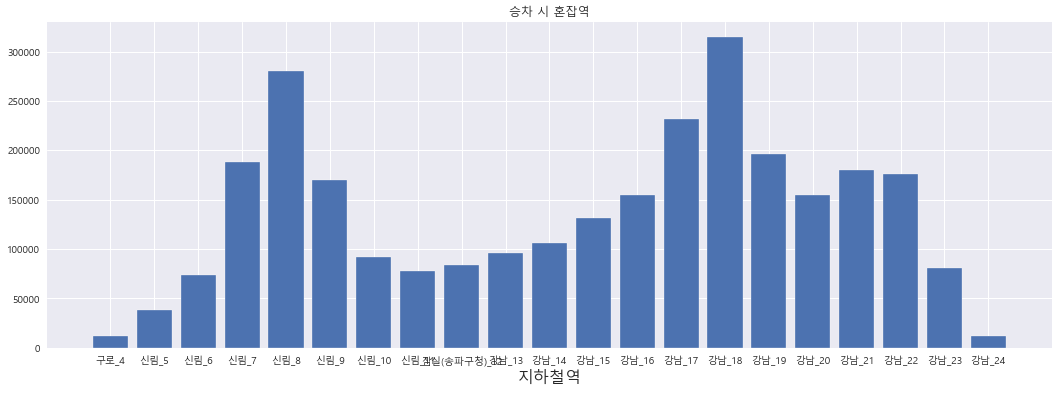

In [279]:
plt.figure(figsize=(18,6))
for i in range(0,42,2):
    plt.bar(time_df['혼잡역'][i],time_df['승객수'][i],color='b')
plt.title('승차 시 혼잡역')
plt.xlabel('지하철역',fontsize=16)

### 강사님 풀이

<AxesSubplot:>

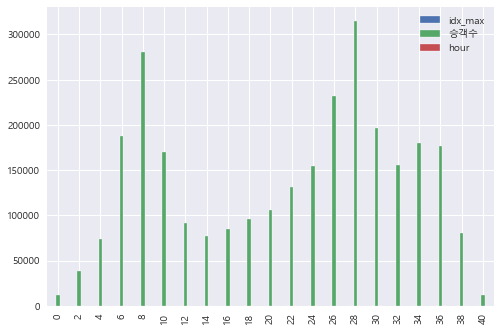

In [281]:
time_df[time_df['승하차'].str.contains('승차')].plot.bar()

In [302]:
time_df_in = time_df[time_df['승하차'].str.contains('승차')]
time_df_out = time_df[time_df['승하차'].str.contains('하차')]

Text(0.5, 1.0, '승차 시 혼잡역')

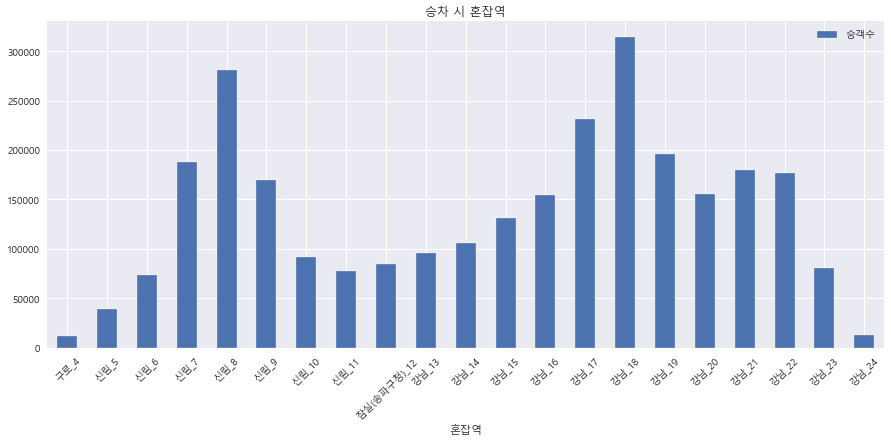

In [301]:
ax = time_df_in.plot.bar(x='혼잡역',y='승객수',figsize=(15,6), rot=45)
ax.set_title('승차 시 혼잡역')

Text(0.5, 1.0, '하차 시 혼잡역')

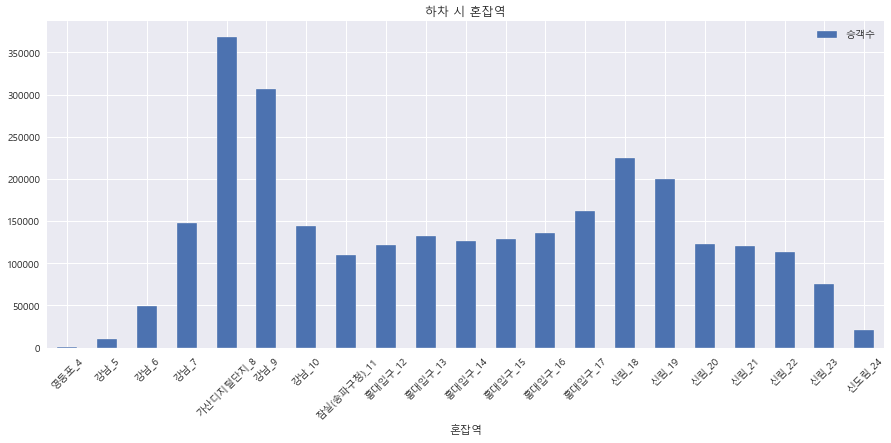

In [303]:
ax = time_df_out.plot.bar(x='혼잡역',y='승객수',figsize=(15,6), rot=45)
ax.set_title('하차 시 혼잡역')

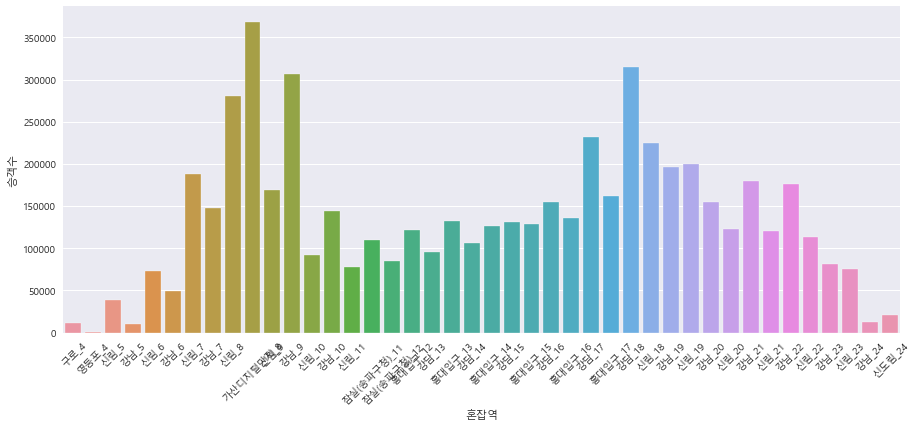

In [299]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='혼잡역',y='승객수',data = time_df)
ax.set_xticklabels(time_df['혼잡역'], rotation=45);

### 원차트 작성

<AxesSubplot:ylabel='승차시 혼잡도 비율'>

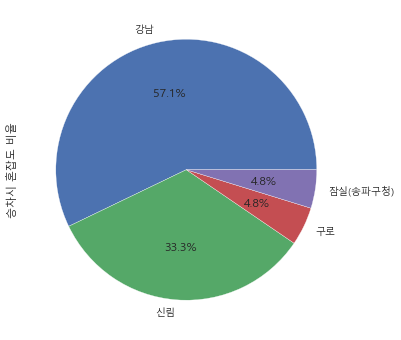

In [309]:
time_df_in.value_counts('지하철역').plot.pie(autopct='%.1f%%',figsize=(10,6), ylabel='승차시 혼잡도 비율')

<AxesSubplot:ylabel='하차시 혼잡도 비율'>

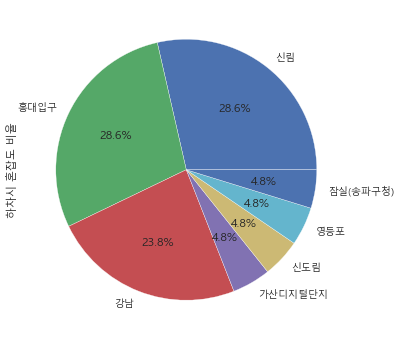

In [310]:
time_df_out.value_counts('지하철역').plot.pie(autopct='%.1f%%',figsize=(10,6), ylabel='하차시 혼잡도 비율')

#### seaborn countplot()

<AxesSubplot:xlabel='지하철역', ylabel='count'>

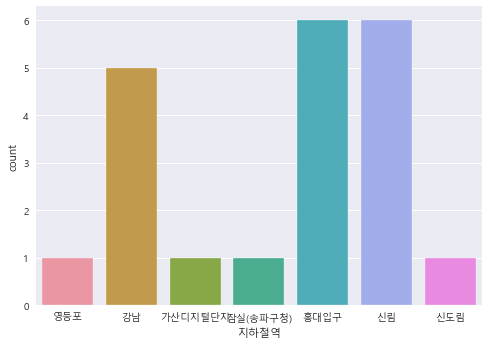

In [311]:
sns.countplot(data=time_df_out, x='지하철역')